# Linear Regression

This notebook implements the exercises from Andrew Ng’s Machine Learning Course on Coursera.

## Linear Regression with One Variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Loading and Visualizing the Dataset

In [2]:
data = np.loadtxt('data/ex1data1.txt', delimiter = ',')
y = data[:,1] # target
X = data[:,0] # feature

Text(0, 0.5, 'Target - Profit in 10000$ ')

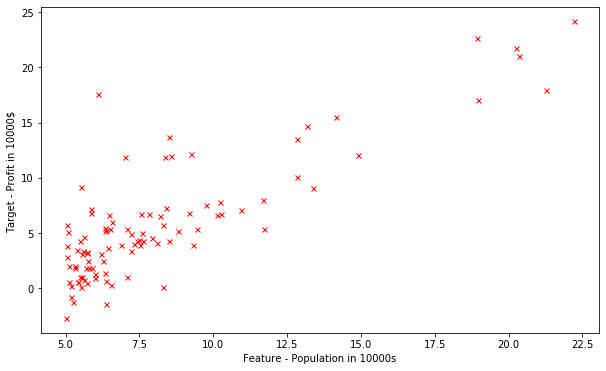

In [3]:
plt.figure(figsize = (10,6))
plt.plot(X, y, 'rx', markersize = 5)
plt.xlabel('Feature - Population in 10000s')
plt.ylabel('Target - Profit in 10000$ ')

### Cost and gradient descent

In [4]:
def descent(X, y, theta, alpha, num_iters):
    """
    Updates theta by taking num_iters gradient steps with learning rate alpha
    Input:
        X - features
        y - target
        theta - parameter/coefficients
        alpha - learning rate
        num_iters - number of iterations
    
    Output:
        theta - Updated parameter
        J - Cost function
    """
    m = float(len(y))
    for i in range(num_iters):
        """
        Compute the cost function:
        hypothesis = theta' * x (matrix form)
        cost, J = 1/2m * sum((hypothesis - y)**2)
        """
        hypothesis = X.dot(theta)
        error = hypothesis - y
        cost = np.sum(error**2) / (2.0 * m)
        #print("Iteration: {} and cost: {}".format(i,cost))
        """
        Update theta for minimum cost:
        theta = theta - alpha/m * sum((hypothesis - y)*x')
        """
        gradient = (np.transpose(X).dot(error)) / m
        theta = theta - alpha * gradient
    return theta,cost

In [5]:
m = len(y) # size of training sets

X_norm = np.column_stack(((np.ones((m,1))), X)) # add intercept to features

# Gradient descent
n = X_norm.shape[1] # number of features
theta = np.zeros(n)
alpha, iters = 0.01, 1500
theta, J = descent(X_norm, y, theta, alpha, iters)

print("Theta found by gradient descent: {}".format(theta))

Theta found by gradient descent: [-3.63029144  1.16636235]


### Plotting the Linear Fit

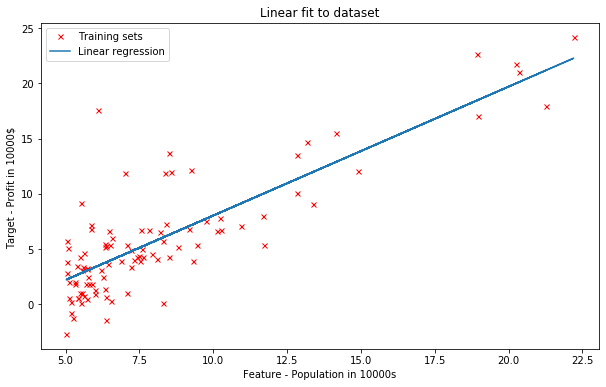

In [6]:
plt.figure(figsize = (10,6))
plt.plot(X, y, 'rx', markersize = 5,label='Training sets')
plt.xlabel('Feature - Population in 10000s')
plt.ylabel('Target - Profit in 10000$ ')

plt.plot(X_norm[:,1], X_norm.dot(theta), ls = '-',label='Linear regression')
plt.title('Linear fit to dataset')
plt.legend(loc = 0)

### Prediction and Evaluation

In [7]:
#Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
print("For population = 35,000, the profit is: {}".format(predict1*10000))
predict2 = np.array([1, 7]).dot(theta)
print("For population = 70,000, the profit is: {}".format(predict2*10000))

For population = 35,000, the profit is: 4519.7678677017675
For population = 70,000, the profit is: 45342.45012944714


### Visualizing Cost Function

In [8]:
def computeCost(X, y, theta):
    """
    This redundant function is just for plotting values of J vs iterations
    """
    m = len(y)
    hyp = X.dot(theta)
    error = hyp - y
    J = 1.0/ (2.0 * m) * sum(error**2)
    return J

In [9]:
def visualize(X, y, expected_theta):
    """
    This function helps in visualizing cost function for different values of theta
    """
    theta0 = np.linspace(-10, 10, 100)
    theta1 = np.linspace(-1, 4, 100)

    J_val = np.zeros((len(theta0),len(theta1)))
    
    for i in range(len(theta0)):
        for j in range(len(theta1)):
            theta = np.array([theta0[i], theta1[j]])
            J_val[i,j] = computeCost(X, y, theta)
    J_val = np.transpose(J_val)

    ## lets plot
    fig,ax=plt.subplots(1,1, figsize = (10,6))
    cset = ax.contour(theta0, theta1, J_val, np.logspace(-2, 3, 20))
    fig.colorbar(cset)
    ax.set_xlabel('theta_0')
    ax.set_ylabel('theta_1')
    ax.set_title('Linear regression with one feature')
    ax.plot(expected_theta[0], expected_theta[1], 'rx', markersize=10, linewidth=2)

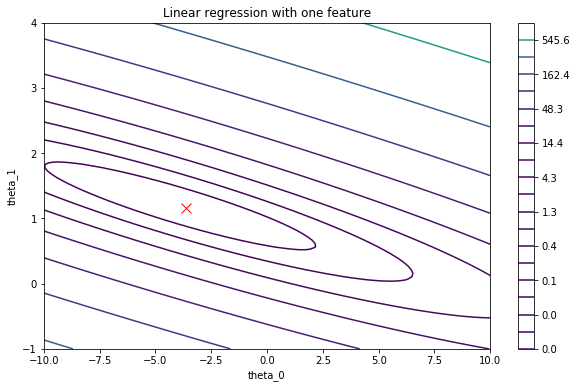

In [10]:
expected_theta = theta
J = visualize(X_norm, y, expected_theta)

## Linear Regression with multiple features

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [11]:
import pandas as pd 

### Loading the Dataset

In [12]:
data = pd.read_csv('data/ex1data2.txt',sep = ",",header=None, names = ['House Area','No of Bedrooms','Price'])

In [13]:
data.head(2)

,House Area,No of Bedrooms,Price
0,2104,3,399900
1,1600,3,329900


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   House Area      47 non-null     int64
 1   No of Bedrooms  47 non-null     int64
 2   Price           47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [15]:
data.describe()

,House Area,No of Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Data Cleaning

Now separate the features (X) and target (y) from dataframe.  
Add a new column (a column of ones) to the beginning of X

In [16]:
X = data[['House Area','No of Bedrooms']]
y = data['Price']

In [17]:
new_col = np.ones((X.shape[0],1))
X.insert(loc = 0, column = 'weights', value = new_col)

### Training Linear Regression Model using Normal equation

In [18]:
## Lets compute the value of theta from normal equation
def normaleq(X, y):
    """
    computes the solution to linear regression using normal equation
    """
    theta = np.zeros(X.shape[1])
    theta = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    return theta

In [19]:
theta = normaleq(X,y)
theta

array([89597.90954361,   139.21067402, -8738.01911255])

### Predicting the house price

Consider an area of 1650 sq m and assume to construct 3 bedroom house.  
Can you predict the house price ??

In [20]:
# now lets estimate house price for a area of 1650 and 3 bedroom
X_test = [1,1650,3]
predicted_val = np.array(X_test).dot(theta)

In [21]:
predicted_val

293081.46433498873

The estimated house price is around 293k $  
Let's check if the predicted price is same if the method used is gradient descent

### Training the Linear Regression Model using Gradient Descent:

This method requires the features to be normalized.

In [22]:
# Step 1: Normalize the features
X_new = data[['House Area','No of Bedrooms']]
mean = X_new.mean()
sigma = np.std(X_new)
X_norm = (X_new - mean) / sigma # all features lie between -3 to 3 or -1/3 to 1/3

Add the intercept column(all ones) to the beginning of normalised X

In [23]:
# Step 2: Add intercept to X_norm
X_norm.insert(loc = 0, column = 'weights', value = new_col)

The learning rate (alpha) is fixed and assume the iterations to be around 400.  
As the iteration progresses, cost function decreases and gradually settles at minima.

In [24]:
# choose value of alpha and number of iterations. Initialize theta
alpha, num_iters, theta_g = 0.01, 400, np.zeros(X_norm.shape[1])

In [25]:
# Step 3: Gradient descent
theta_g, J = descent(X_norm, y, theta_g, alpha, num_iters)

In [26]:
theta_g

weights           334302.063993
House Area         99411.449474
No of Bedrooms      3267.012854
dtype: float64

### Predicting the house price

In [27]:
# Step 5: lets estimate house price for a area of 1650 and 3 bedroom
area_norm = (1650 - mean[0])/sigma[0]
bed_norm = (3 - mean[1]) / sigma[1]
test_norm = [1, area_norm, bed_norm]

In [28]:
predicted_price = np.array(test_norm).dot(theta_g)
predicted_price

289221.5473712181

The estimated house price is around 289k $

### Comparison between Gradient descent and Normal equation

In [29]:
print('theta using Normal equation: ', theta)
print('theta using Gradient descent: \n', theta_g)

theta using Normal equation:  [89597.90954361   139.21067402 -8738.01911255]
theta using Gradient descent: 
 weights           334302.063993
House Area         99411.449474
No of Bedrooms      3267.012854
dtype: float64


In [30]:
print('House price estimation using Normal equation: ', predicted_val)
print('House price estimation using Gradient descent: ', predicted_price)

House price estimation using Normal equation:  293081.46433498873
House price estimation using Gradient descent:  289221.5473712181
